In [1]:
import sympy as sp
import numpy as np
from scipy import integrate #solution to a diff eqtn is intergration
import matplotlib.pyplot as plt

In [2]:
x=sp.symbols("x")
y=sp.Function("y")
f=y(x)**2+x

f_np=sp.lambdify((y(x),x),f)

y0=0
xp=np.linspace(0,1.9,100)

### Direction field
* This is a simple and useful technique used to visualize possible sollutions to arbitrary first-order ODE,given the indipendent
  variable x 

In [16]:
def plot_direction_field(x,y_x,f_xy,x_lim=(-5,5),y_lim=(-5,5),ax=None):
    f_np=sp.lambdify((x,y_x),f_xy,'numpy')
    x_vec=np.linspace(x_lim[0],x_lim[1],20)
    y_vec=np.linspace(y_lim[0],y_lim[1],20)
     
    if ax is None:
        _,ax=plt.subplots(figsize=(4,4))
    dx=x_vec[1] - x_vec[0]
    dy=y_vec[1]-y_vec[0]
    
    for m,xx in enumerate(x_vec):
        for n,yy in enumerate(y_vec):
            Dy=f_np(xx,yy)*dx
            Dx=0.8*dx**2/np.sqrt(dx**2+Dy**2)
            Dy=0.8*Dy*dy/np.sqrt(dx**2+Dy**2)
            
            ax.plot([xx-Dx/2,xx+Dx/2],[yy-Dy/2,yy+Dy/2],'b',lw=0.5)
    ax.axis('tight')
    ax.set_title(r"$%s$" %(sp.latex(sp.Eq(y(x).diff(x),f_xy))),fontsize=18)
    return ax
    

<Axes: title={'center': '$\\frac{d}{d x} y{\\left(x \\right)} = \\frac{y^{2}{\\left(x \\right)}}{x}$'}>

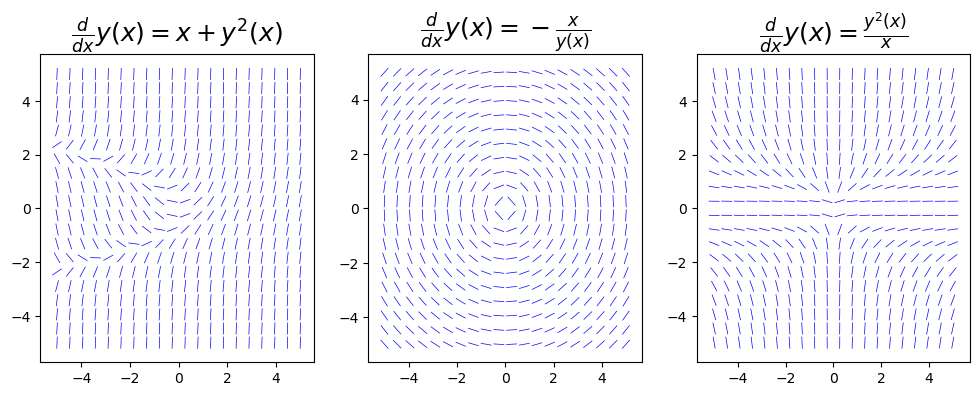

In [7]:
x=sp.symbols("x")
y=sp.Function("y")

fig,axes=plt.subplots(1,3,figsize=(12,4))
plot_direction_field(x,y(x),y(x)**2+x,ax=axes[0])
plot_direction_field(x,y(x),-x/y(x),ax=axes[1])
plot_direction_field(x,y(x),y(x)**2/x,ax=axes[2])


In [29]:
x=sp.Symbol("x")
y=sp.Function("y")
f=y(x)**2+x




sp.Eq(y(x).diff(x),f)


Eq(Derivative(y(x), x), x + y(x)**2)

In [2]:
# ics={y(0):0}
# ode_sol=sp.dsolve(y(x).diff(x)-y(x)**2+x)
# ode_sol

### solving an ODE using sympy 

In [12]:
x=sp.Symbol("x")
y=sp.Function("y")
f=y(x)**2+x


In [13]:
#creating a python function that takes numpy arrays as input
f_np=sp.lambdify((y(x),x),f)
f_np

<function _lambdifygenerated(_Dummy_39, x)>

In [14]:
y0=0
xp=np.linspace(0,1.9,100)
yp=integrate.odeint(f_np,y0,xp)
xm=np.linspace(0,-5,100)
ym=integrate.odeint(f_np,y0,xm)
#the resulting results are two one dimensional Numpy arrays ym and yp of ame lenth since ie.points 100 for each


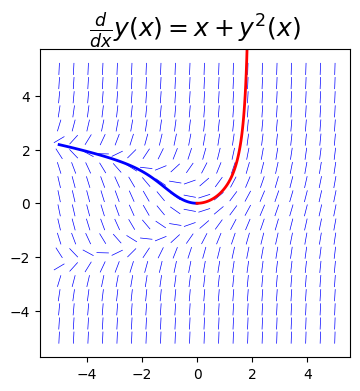

In [17]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
plot_direction_field(x,y(x),f,ax=ax)
ax.plot(xm,ym,'b',lw=2)
ax.plot(xp,yp,'r',lw=2)


In [18]:
'''
Loktka -Voltera equations for the dynamics of population  of predator  and prey animals
(classic example of a coupled system)
x'(t)=ax-bxy and y'(t)=cxy-dy
where x'(t)=is no of prey animals
      y'(t)=is the no. of predator animals
      and the coefficients a,b,c,d describe the rate of the process in the model
      
      ie. a-rate at which preya nimals are born
          d- rate at which are predators die
          b-rate at which predators consume prey
          d-rate at which the prdator population grows at the expense of the prey popualtion
#initial values of pradators and prey at the begining of the simulations
x(0)=600
y(0)=400
t-array defining the points at which we wich to compute the solutions of the ODE
          
'''
a,b,c,d=0.4,0.002,0.001,0.7
def f(xy,t):
    x,y=xy
    return [a*x-b*x*y,c*x*y-d*y]

xy0=[600,400]
t=np.linspace(0,50,250)
xy_t=integrate.odeint(f,xy0,t)
xy_t.shape #250 values in t and x(t) and y(t) arrays

(250, 2)

Text(0, 0.5, 'Number of predators')

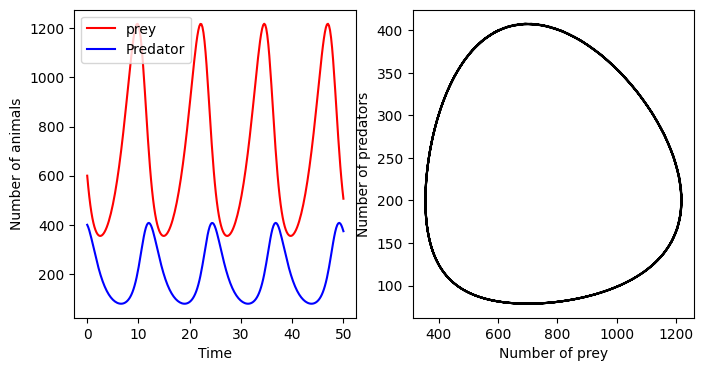

In [19]:
fig,axes=plt.subplots(1,2,figsize=(8,4))
axes[0].plot(t,xy_t[:,0],'r',label="prey")
axes[0].plot(t,xy_t[:,1],'b',label="Predator")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Number of animals")
axes[0].legend()
axes[1].plot(xy_t[:,0],xy_t[:,1],'k')
axes[1].set_xlabel("Number of prey")
axes[1].set_ylabel("Number of predators")